In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import json
import sys
sys.path.append('/Users/vdk/Software/code/')
import h5py
from astropy.table import Table, vstack
from ctapipe.io import EventSource
from ctapipe.visualization import CameraDisplay
import glob
from python_modules.muonpipe import usefull_func
import seaborn as sns
from ctapipe.image import tailcuts_clean
import scipy.stats as stats
from scipy.interpolate import interp1d
import statsmodels.api as sm
from datetime import datetime

filename = '/Users/vdk/muons2024/data/for_comparison/nsb_tuning/triple_tuning/run101_muon.simtel.gz'
source = EventSource(filename, max_events = 1)
camgeom = source.subarray.tel[1].camera.geometry
summer_refractive_index = 1+0.00020409512542851616
winter_refractive_index = 1+0.00020953240736654166

start_date_2019 = datetime.strptime("2019-11-25 00:00:00.0", "%Y-%m-%d %H:%M:%S.%f").timestamp()

start_date_2020 = datetime.strptime("2020-01-01 00:00:00.0", "%Y-%m-%d %H:%M:%S.%f").timestamp()
end_date_2020 = datetime.strptime("2020-12-31 00:00:00.0", "%Y-%m-%d %H:%M:%S.%f").timestamp()

start_date_2021 = datetime.strptime("2021-01-01 00:00:00.0", "%Y-%m-%d %H:%M:%S.%f").timestamp()
end_date_2021 = datetime.strptime("2021-12-31 00:00:00.0", "%Y-%m-%d %H:%M:%S.%f").timestamp()

start_date_2022 = datetime.strptime("2022-01-01 00:00:00.0", "%Y-%m-%d %H:%M:%S.%f").timestamp()
end_date_2022 = datetime.strptime("2022-12-31 00:00:00.0", "%Y-%m-%d %H:%M:%S.%f").timestamp()

start_date_2023 = datetime.strptime("2023-01-01 00:00:00.0", "%Y-%m-%d %H:%M:%S.%f").timestamp()
end_date_2023 = datetime.strptime("2023-12-31 00:00:00.0", "%Y-%m-%d %H:%M:%S.%f").timestamp()

start_date_2024 = datetime.strptime("2024-01-01 00:00:00.0", "%Y-%m-%d %H:%M:%S.%f").timestamp()
end_date_2024 = datetime.strptime("2024-12-31 00:00:00.0", "%Y-%m-%d %H:%M:%S.%f").timestamp()


import matplotlib.style as mplstyle

mplstyle.use('test_style.mplstyle')

In [2]:
size_outside_cut = 500
muon_efficiency_cut = 1
min_impact = 2.2199933748101555
max_impact = 9.983608702234397

In [3]:
#muon_files = glob.glob('/Users/vdk/muons2024/all_muon_fits/low_nsb_filter/*')
muon_files = glob.glob('/Users/vdk/Documents/DocumentsVadymMacBookWork/all_muon_fits/low_nsb_filter/*')
print(sorted(muon_files))

df_files = [pd.read_csv(muon_file, na_values=['NA', '?']) for muon_file in sorted(muon_files)[:]] 
df_all_data = pd.concat(df_files, ignore_index=True)
df_good_data_real = df_all_data[(df_all_data['muon_efficiency'] < muon_efficiency_cut) & (df_all_data['size_outside'] < size_outside_cut)]
del(df_all_data)
df_good_data_real

['/Users/vdk/Documents/DocumentsVadymMacBookWork/all_muon_fits/low_nsb_filter/1_0-25k_lowNSBmuons.csv', '/Users/vdk/Documents/DocumentsVadymMacBookWork/all_muon_fits/low_nsb_filter/2_25-50k_lowNSBmuons.csv', '/Users/vdk/Documents/DocumentsVadymMacBookWork/all_muon_fits/low_nsb_filter/3_50-75k_lowNSBmuons.csv', '/Users/vdk/Documents/DocumentsVadymMacBookWork/all_muon_fits/low_nsb_filter/4_75-100k_lowNSBmuons.csv', '/Users/vdk/Documents/DocumentsVadymMacBookWork/all_muon_fits/low_nsb_filter/5_100-125k_lowNSBmuons.csv', '/Users/vdk/Documents/DocumentsVadymMacBookWork/all_muon_fits/low_nsb_filter/6_125-150k_lowNSBmuons.csv', '/Users/vdk/Documents/DocumentsVadymMacBookWork/all_muon_fits/low_nsb_filter/7_150-175k_lowNSBmuons.csv', '/Users/vdk/Documents/DocumentsVadymMacBookWork/all_muon_fits/low_nsb_filter/8_0-600fits_lowNSB.csv', '/Users/vdk/Documents/DocumentsVadymMacBookWork/all_muon_fits/low_nsb_filter/91_1200-1800fits_lowNSB.csv', '/Users/vdk/Documents/DocumentsVadymMacBookWork/all_muon

/var/folders/_p/3fmt5jz5231_9gxtm8xt76p00000gn/T/ipykernel_60995/3661142016.py:5: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_files = [pd.read_csv(muon_file, na_values=['NA', '?']) for muon_file in sorted(muon_files)[:]]
/var/folders/_p/3fmt5jz5231_9gxtm8xt76p00000gn/T/ipykernel_60995/3661142016.py:5: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_files = [pd.read_csv(muon_file, na_values=['NA', '?']) for muon_file in sorted(muon_files)[:]]
/var/folders/_p/3fmt5jz5231_9gxtm8xt76p00000gn/T/ipykernel_60995/3661142016.py:5: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_files = [pd.read_csv(muon_file, na_values=['NA', '?']) for muon_file in sorted(muon_files)[:]]
/var/folders/_p/3fmt5jz5231_9gxtm8xt76p00000gn/T/ipykernel_60995/3661142016.py:5: DtypeWarning: Columns (9) have mixed types. Specify dtype option on impo

,event_id,event_time,mc_energy,ring_size,size_outside,ring_center_x,ring_center_y,ring_radius,ring_width,good_ring,...,impact_parameter,impact_x_array,impact_y_array,radial_stdev,radial_skewness,radial_excess_kurtosis,num_pixels_in_ring,mean_pixel_charge_around_ring,hg_peak_sample,lg_peak_sample
0,60.0,1.574637e+09,-1.0,2311.1147,0.000000,-0.975512,-0.354570,1.038939,0.066076,1.0,...,6.481509,6.331281,1.387386,0.059634,-0.111103,0.311915,371.0,0.039351,13.0,0.0
1,287.0,1.574637e+09,-1.0,2646.7896,0.000000,0.353987,0.463572,1.192394,0.039972,1.0,...,6.638931,0.768292,6.594326,0.042449,0.208130,0.457135,493.0,0.104818,15.0,0.0
2,815.0,1.574637e+09,-1.0,2682.9595,0.000000,0.200454,0.503540,1.155244,0.050399,1.0,...,5.826689,5.821747,-0.239914,0.049087,0.312026,0.410487,478.0,0.048045,17.0,0.0
3,1248.0,1.574637e+09,-1.0,2802.3580,0.000000,0.719930,0.076793,1.203815,0.034111,1.0,...,4.560473,1.679653,4.239891,0.038754,0.229592,0.123887,499.0,0.371614,19.0,0.0
4,1573.0,1.574637e+09,-1.0,2121.7700,0.000000,-0.878445,0.215899,1.024937,0.093730,1.0,...,8.680637,-3.656715,-7.872858,0.077182,-0.073894,0.545917,358.0,0.000755,14.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31308385,4843910.0,1.719445e+09,-1.0,1624.1024,8.637733,-0.659971,0.876965,0.848291,0.116848,1.0,...,9.798134,-9.516054,2.334126,0.095898,-0.030282,-0.441889,251.0,0.703649,17.0,0.0
31308386,4849315.0,1.719445e+09,-1.0,2414.9480,0.000000,-0.454369,-0.084192,1.216073,0.040280,1.0,...,7.001510,-5.435892,4.412734,0.042521,0.049803,0.318690,509.0,0.236881,15.0,0.0
31308387,4849722.0,1.719445e+09,-1.0,1970.0897,0.000000,0.253036,0.191820,1.140060,0.090437,1.0,...,9.286253,-0.358254,9.279340,0.067051,-0.067978,-0.366449,449.0,0.183407,18.0,0.0
31308388,4850938.0,1.719445e+09,-1.0,1704.5847,0.000000,0.259656,1.009226,0.828704,0.082265,1.0,...,3.947441,3.907940,-0.557041,0.068710,0.337672,-0.121390,235.0,0.282522,18.0,0.0


In [9]:
listdir = glob.glob('/Users/vdk/muons2024/lapalma_simulations/nsb_play/grand_tune/2020/tables/*')
listdir = glob.glob('/Users/vdk/muons2024/lapalma_simulations/nsb_play/grand_tune/2021/tables/*')
# listdir = glob.glob('/Users/vdk/muons2024/lapalma_simulations/nsb_play/grand_tune/2023/tables/*')
listdir= glob.glob('/Users/vdk/muons2024/lapalma_simulations/nsb_play/nsb_tune_2024_year_no_outliers/tables/*')

#listdir = glob.glob('/Users/vdk/muons2024/lapalma_simulations/proper_mc_config/nsbtune2020year_tuned_reflectivity/tables/*')
#listdir = glob.glob('/Users/vdk/muons2024/lapalma_simulations/proper_mc_config/nsbtune2021year_tuned_reflectivity/tables/*')
#listdir = glob.glob('/Users/vdk/muons2024/lapalma_simulations/proper_mc_config/nsbtune2023year_tuned_reflectivity/tables/*')
#listdir = glob.glob('/Users/vdk/muons2024/lapalma_simulations/proper_mc_config/nsbtune2024year_tuned_reflectivity/tables/*')

dat = Table.read('{}'.format(listdir[0]), format='fits')

for muon_file in listdir:
    dat2 = Table.read(muon_file, format='fits')
    dat = vstack([dat, dat2])

df = dat.to_pandas()
df_sim_2024_tune = df[df['good_ring'] & (df['muon_efficiency'] < muon_efficiency_cut) & (df['size_outside'] < size_outside_cut)]
df_sim_2024_tune

,event_id,event_time,mc_energy,ring_size,size_outside,ring_center_x,ring_center_y,ring_radius,ring_width,good_ring,...,impact_parameter,impact_x_array,impact_y_array,radial_stdev,radial_skewness,radial_excess_kurtosis,num_pixels_in_ring,mean_pixel_charge_around_ring,hg_peak_sample,lg_peak_sample
0,100,NaN,0.023803,2570.853516,0.0,-0.213153,-0.788102,1.202834,0.044846,True,...,5.745710,-4.012122,-4.112914,0.046104,0.678342,0.789937,495,0.107114,NaN,NaN
2,102,NaN,0.023803,2209.003418,0.0,-0.237890,-0.782268,1.223406,0.034642,True,...,8.606471,7.802477,-3.632176,0.040229,0.393557,-0.394901,509,-0.055301,NaN,NaN
3,103,NaN,0.023803,2714.977051,0.0,-0.232969,-0.764751,1.197771,0.023434,True,...,5.343220,4.449493,2.958380,0.033983,0.279437,-0.188457,493,0.019705,NaN,NaN
4,104,NaN,0.023803,2539.495605,0.0,-0.220242,-0.772855,1.188093,0.052506,True,...,6.550038,-1.160941,6.446334,0.050417,0.550434,0.479041,484,0.078212,NaN,NaN
5,200,NaN,0.010941,2436.390625,0.0,0.131549,-0.156112,1.065075,0.038365,True,...,3.350067,-0.966292,-3.207683,0.043882,0.018786,-0.227681,392,-0.097023,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423499,585501,NaN,0.018149,2707.843506,0.0,0.288501,0.327443,1.164642,0.025228,True,...,2.349843,2.154713,0.937537,0.034553,0.087894,0.020937,469,0.097125,NaN,NaN
423501,585503,NaN,0.018149,2239.228516,0.0,0.287327,0.331258,1.182949,0.070302,True,...,8.213475,7.090454,4.145675,0.064628,0.325954,0.034635,488,-0.083203,NaN,NaN
423503,585600,NaN,0.035739,2325.124512,0.0,-0.258630,0.291109,1.245028,0.043139,True,...,8.155543,6.566669,4.836501,0.045923,0.514904,0.115571,534,0.062384,NaN,NaN
423504,585601,NaN,0.035739,2624.559570,0.0,-0.242506,0.269278,1.206394,0.023504,True,...,3.562139,-0.429476,-3.536154,0.031676,-0.053995,-0.235491,504,0.002232,NaN,NaN


In [10]:
ring_containment_cut = 0.3
ring_completeness_cut = 0.99
min_radius_cut = 0.95
max_radius_cut = 1.15


df_real_data_cut_2020 = df_good_data_real[ 
    (df_good_data_real['ring_completeness'] > ring_completeness_cut) &
    (df_good_data_real['ring_containment'] > ring_containment_cut) &
    (df_good_data_real['ring_radius'] > min_radius_cut) &  
    (df_good_data_real['ring_radius'] < max_radius_cut) &  
    (df_good_data_real['event_time'] > start_date_2020) &
    (df_good_data_real['event_time'] < end_date_2020)
]

df_real_data_cut_2021 = df_good_data_real[ 
    (df_good_data_real['ring_completeness'] > ring_completeness_cut) &
    (df_good_data_real['ring_containment'] > ring_containment_cut) &
    (df_good_data_real['ring_radius'] > min_radius_cut) &  
    (df_good_data_real['ring_radius'] < max_radius_cut) &  
    (df_good_data_real['event_time'] > start_date_2021) &
    (df_good_data_real['event_time'] < end_date_2021)
]

df_real_data_cut_2022 = df_good_data_real[ 
    (df_good_data_real['ring_completeness'] > ring_completeness_cut) &
    (df_good_data_real['ring_containment'] > ring_containment_cut) &
    (df_good_data_real['ring_radius'] > min_radius_cut) &  
    (df_good_data_real['ring_radius'] < max_radius_cut) &  
    (df_good_data_real['event_time'] > start_date_2022) &
    (df_good_data_real['event_time'] < end_date_2022)
]

df_real_data_cut_2023 = df_good_data_real[ 
    (df_good_data_real['ring_completeness'] > ring_completeness_cut) &
    (df_good_data_real['ring_containment'] > ring_containment_cut) &
    (df_good_data_real['ring_radius'] > min_radius_cut) &  
    (df_good_data_real['ring_radius'] < max_radius_cut) &  
    (df_good_data_real['event_time'] > start_date_2023) &
    (df_good_data_real['event_time'] < end_date_2023)
]

df_real_data_cut_2024 = df_good_data_real[ 
    (df_good_data_real['ring_completeness'] > ring_completeness_cut) &
    (df_good_data_real['ring_containment'] > ring_containment_cut) &
    (df_good_data_real['ring_radius'] > min_radius_cut) &  
    (df_good_data_real['ring_radius'] < max_radius_cut) &  
    (df_good_data_real['event_time'] > start_date_2024) &
    (df_good_data_real['event_time'] < end_date_2024)
]

# df_sim_cut_nsbtune = df_sim_data_global_integration_cor_nsbtune[
#     (df_sim_data_global_integration_cor_nsbtune['ring_radius'] > min_radius_cut) & 
#     (df_sim_data_global_integration_cor_nsbtune['ring_radius'] < max_radius_cut) &
#     (df_sim_data_global_integration_cor_nsbtune['ring_completeness'] > ring_completeness_cut) & 
#     (df_sim_data_global_integration_cor_nsbtune['ring_containment'] > ring_containment_cut) 
# ]

# df_sim_cut = df_sim_zenith10[
#     (df_sim_zenith10['ring_radius'] > min_radius_cut) & 
#     (df_sim_zenith10['ring_radius'] < max_radius_cut) &
#     (df_sim_zenith10['ring_completeness'] > ring_completeness_cut) & 
#     (df_sim_zenith10['ring_containment'] > ring_containment_cut) 
# ]

df_sim_cut_2024_tune = df_sim_2024_tune[
    (df_sim_2024_tune['ring_radius'] > min_radius_cut) & 
    (df_sim_2024_tune['ring_radius'] < max_radius_cut) &
    (df_sim_2024_tune['ring_completeness'] > ring_completeness_cut) & 
    (df_sim_2024_tune['ring_containment'] > ring_containment_cut) 
]






print(f"Size of the sim 2024 tune dataset {len(df_sim_cut_2024_tune)}")
#print(f"Size of the obs dataset {len(df_real_data_cut)}")



Size of the sim 2024 tune dataset 690


/var/folders/_p/3fmt5jz5231_9gxtm8xt76p00000gn/T/ipykernel_1298/4282064654.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_mc['binned_radius'] = pd.cut(data_mc['ring_radius'], bins, include_lowest=True, labels=False)
/var/folders/_p/3fmt5jz5231_9gxtm8xt76p00000gn/T/ipykernel_1298/4282064654.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_run['binned_radius'] = pd.cut(data_run['ring_radius'], bins, include_lowest=True, labels=False)


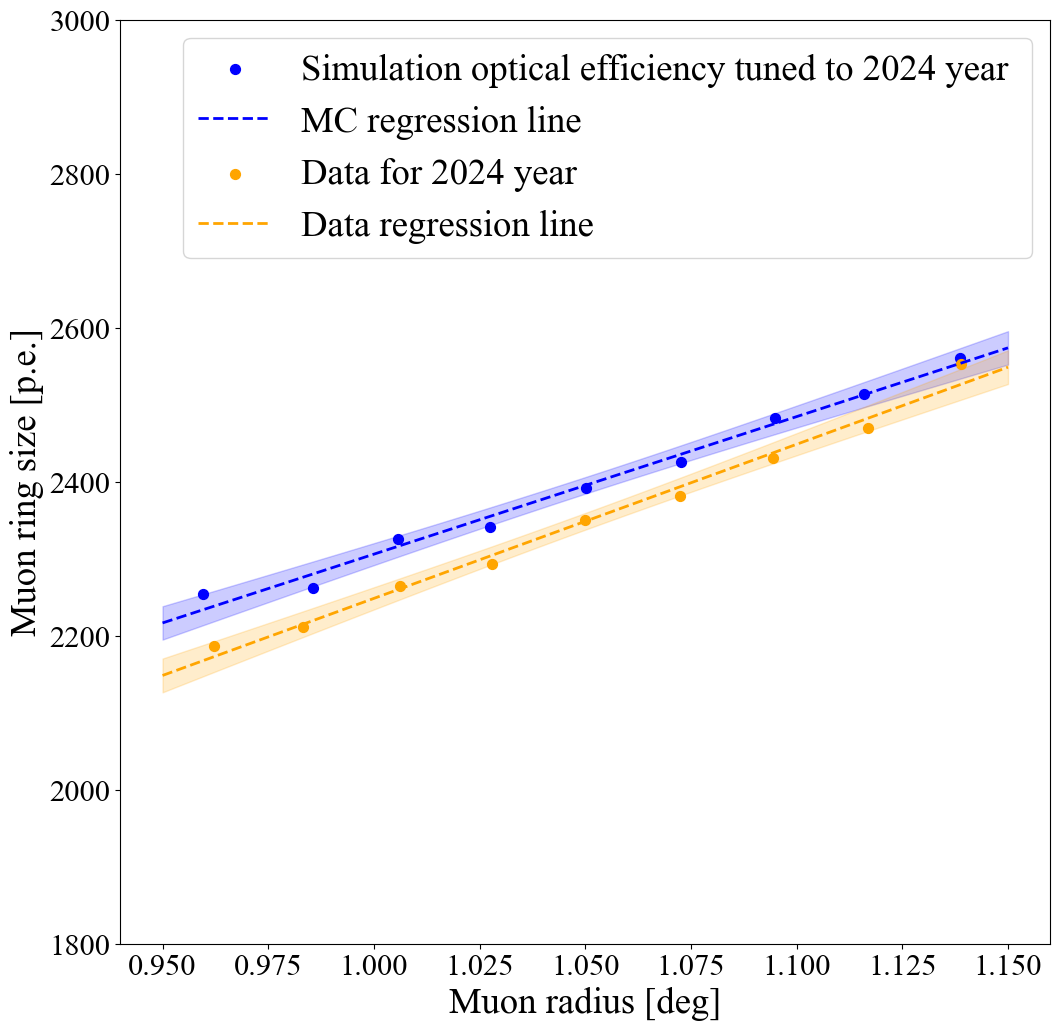

In [12]:
year_value = 2024
data_mc = df_sim_cut_2024_tune
data_run = eval(f"df_real_data_cut_{year_value}")


# Define the bins
bins = np.linspace(min_radius_cut, max_radius_cut, 10)
# Generate x values for the regression lines
x_values = np.linspace(bins.min(), bins.max(), 300)
x_values_with_const = sm.add_constant(x_values)


# Bin the data for MC
data_mc['binned_radius'] = pd.cut(data_mc['ring_radius'], bins, include_lowest=True, labels=False)
binned_mc = data_mc.groupby('binned_radius').agg({
    'ring_radius': 'mean',
    'ring_size': 'mean'
})
binned_mc['ring_size'] = binned_mc['ring_size'] * 0.998
binned_mc['constant'] = 1
model_mc = sm.OLS(binned_mc['ring_size'], binned_mc[['constant', 'ring_radius']]).fit()
y_values_mc = model_mc.predict(x_values_with_const)
prediction_mc = model_mc.get_prediction(x_values_with_const)
conf_int_mc = prediction_mc.conf_int()


# # Bin the data for MC
# df_real_data_cut_2021['binned_radius'] = pd.cut(df_real_data_cut_2021['ring_radius'], bins, include_lowest=True, labels=False)
# binned_data_2021 = df_real_data_cut_2021.groupby('binned_radius').agg({
#     'ring_radius': 'mean',
#     'ring_size': 'mean'
# })
# binned_data_2021['ring_size'] = binned_data_2021['ring_size']
# binned_data_2021['constant'] = 1
# model_data_2021 = sm.OLS(binned_data_2021['ring_size'], binned_data_2021[['constant', 'ring_radius']]).fit()
# # Generate y values and confidence intervals using the regression models
# y_values_data_2021 = model_data_2021.predict(x_values_with_const)
# prediction_data_2021 = model_data_2021.get_prediction(x_values_with_const)
# conf_int_mc_2021 = prediction_data_2021.conf_int()


# Bin the data for Run
data_run['binned_radius'] = pd.cut(data_run['ring_radius'], bins, include_lowest=True, labels=False)
binned_run = data_run.groupby('binned_radius').agg({
    'ring_radius': 'mean',
    'ring_size': 'mean'
})
binned_run['constant'] = 1
model_run = sm.OLS(binned_run['ring_size'], binned_run[['constant', 'ring_radius']]).fit()
y_values_run = model_run.predict(x_values_with_const)
prediction_run = model_run.get_prediction(x_values_with_const)
conf_int_run = prediction_run.conf_int()


# Plotting
plt.figure(figsize=(12, 12))

# Plotting MC data
plt.scatter(binned_mc['ring_radius'], binned_mc['ring_size'], color='blue', label='Simulation optical efficiency tuned to 2024 year ', s=50)
plt.plot(x_values, y_values_mc, color='blue', linestyle='--', label='MC regression line')
plt.fill_between(x_values, conf_int_mc[:, 0], conf_int_mc[:, 1], color='blue', alpha=0.2)

# plt.scatter(binned_data_2021['ring_radius'], binned_data_2021['ring_size'], color='blue', label='Simulation with tuned NSB to Run17043 (0.31 GHz)', s=50)
# plt.plot(x_values, y_values_data_2021, color='blue', linestyle='--', label='MC regression line')
# plt.fill_between(x_values, conf_int_data_2021[:, 0], conf_int_data_2021[:, 1], color='', alpha=0.2)

# Plotting Data Run
plt.scatter(binned_run['ring_radius'], binned_run['ring_size'], color='orange', label=f'Data for {year_value} year', s=50)

plt.plot(x_values, y_values_run, color='orange', linestyle='--', label='Data regression line')
plt.fill_between(x_values, conf_int_run[:, 0], conf_int_run[:, 1], color='orange', alpha=0.2)


# Adding labels and legend
plt.xlabel('Muon radius [deg]')
plt.ylabel('Muon ring size [p.e.]')
plt.legend()
plt.ylim(1800,3000)
#plt.grid(alpha=0.5)
#plt.title(f"Quality cuts containment > {ring_containment_cut} completeness > {ring_completeness_cut}")
#plt.show()
#plt.savefig(f'/Users/vdk/muons2024/images/PlanPaper/cuts_investigation/2022tune_size_vs_radius_{year_value}year_cont{ring_containment_cut}_comp{ring_completeness_cut}.pdf', dpi=200, format='pdf', bbox_inches='tight')
#plt.savefig(f'/Users/vdk/muons2024/images/AA_paper/2024NSBtune_size_vs_radius_{year_value}year_cont{ring_containment_cut}_comp{ring_completeness_cut}.pdf', dpi=200, format='pdf', bbox_inches='tight')

In [6]:
# Example usage
min_energy_eV = 6e9  # 1 GeV
max_energy_eV = 1e12  # 1 TeV
num_points = 1000

energies, summer_angles = usefull_func.plot_cherenkov_angle_distribution(min_energy_eV, max_energy_eV, num_points,refractive_index=summer_refractive_index)
energies, winter_angles = usefull_func.plot_cherenkov_angle_distribution(min_energy_eV, max_energy_eV, num_points,refractive_index=winter_refractive_index)

Maximum angle value for the summer = 1.157 degrees
Maximum angle value for the winter = 1.173 degrees


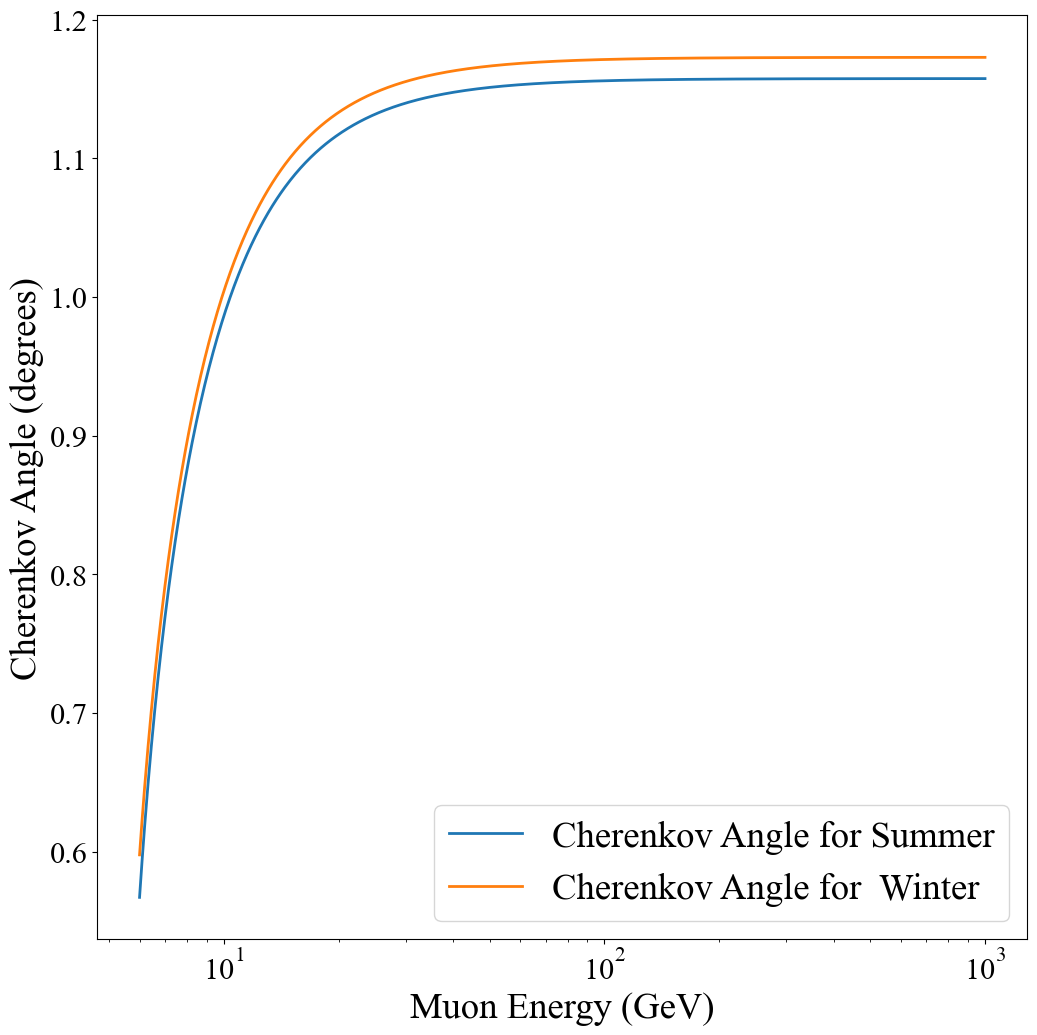

In [49]:
print(f"Maximum angle value for the summer = {round(max(summer_angles),3)} degrees")
print(f"Maximum angle value for the winter = {round(max(winter_angles),3)} degrees")
plt.plot(energies, summer_angles, label='Cherenkov Angle for Summer')
plt.plot(energies, winter_angles, label='Cherenkov Angle for  Winter')
plt.xscale('log')
plt.xlabel('Muon Energy (GeV)')
plt.ylabel('Cherenkov Angle (degrees)')
#plt.title('Cherenkov Angle Distribution as a Function of Muon Energy and refractive index')
plt.legend()
#plt.savefig('/Users/vdk/muons2024/images/AA_paper/cherenkov_angle_distribution.pdf', dpi=200, format='pdf', bbox_inches='tight')

### Muon ring data

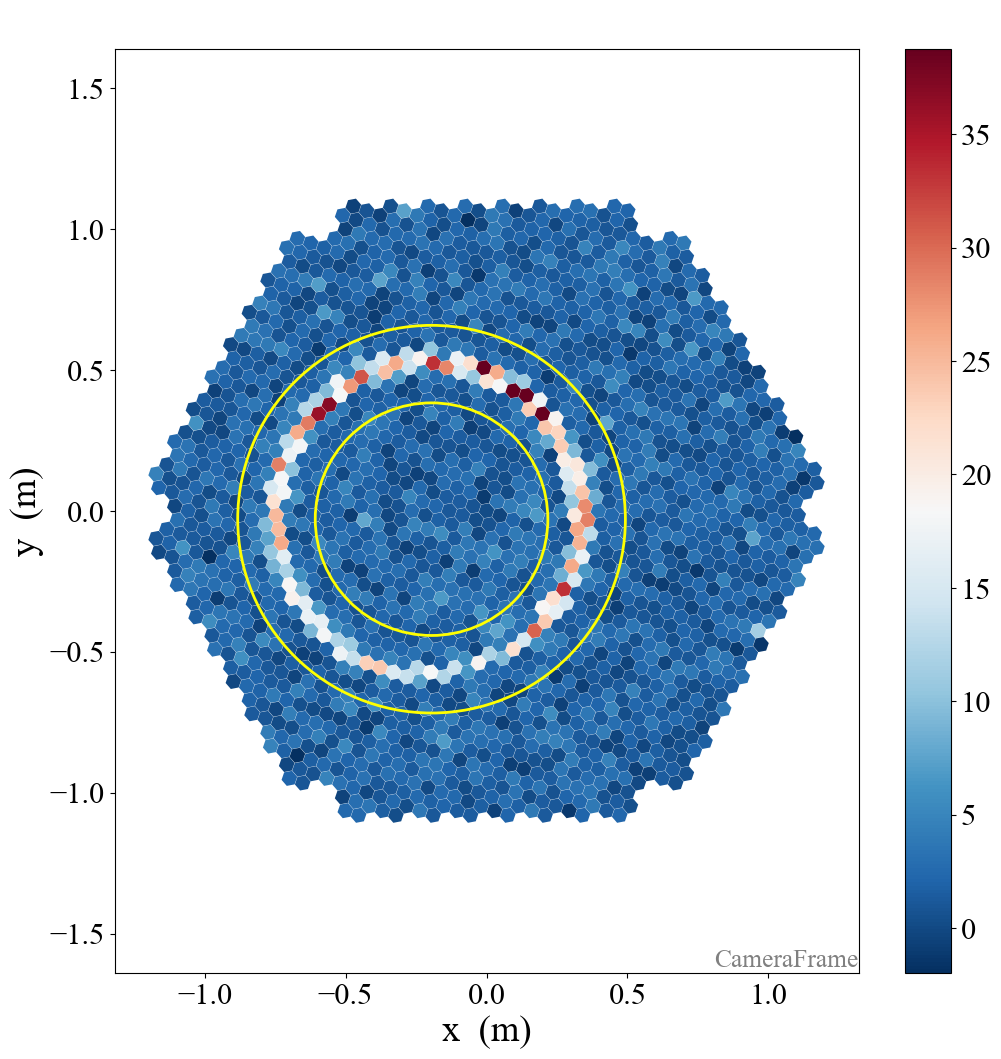

In [24]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from ctapipe.visualization import CameraDisplay
from ctapipe.io import EventSource
image_folder = glob.glob('/Users/vdk/muons2024/data/17043/dl1_image/*')

data_dl1_images = []

for file in image_folder:
    tmp_result = np.load(file)
    data_dl1_images.append(tmp_result)
    
for i,event in enumerate(data_dl1_images[:50]):
        if i == 26:
            camgeom = source.subarray.tel[1].camera.geometry
            disp = CameraDisplay(camgeom,title='1')
            disp.image = event #.sum(axis=1)
            disp.cmap = plt.cm.RdBu_r
            disp.add_colorbar()
            disp.set_limits_percent(95)
            R = 0.55
            R_plus = R + 0.25 * R
            R_minus = R - 0.25 * R

    # Add circles to the display
            circle_plus = Circle((-0.195, -0.03), R_plus, edgecolor='yellow', facecolor='none', linewidth=2)
            circle_minus = Circle((-0.195, -0.03), R_minus, edgecolor='yellow', facecolor='none', linewidth=2)

            ax = disp.axes
            ax.add_patch(circle_plus)
            ax.add_patch(circle_minus)
            plt.title(" ")
            #plt.savefig('/Users/vdk/muons2024/images/AA_paper/muon_ring.pdf', dpi=200, format='pdf', bbox_inches='tight')
            break
        #plt.show()

## Radius hist

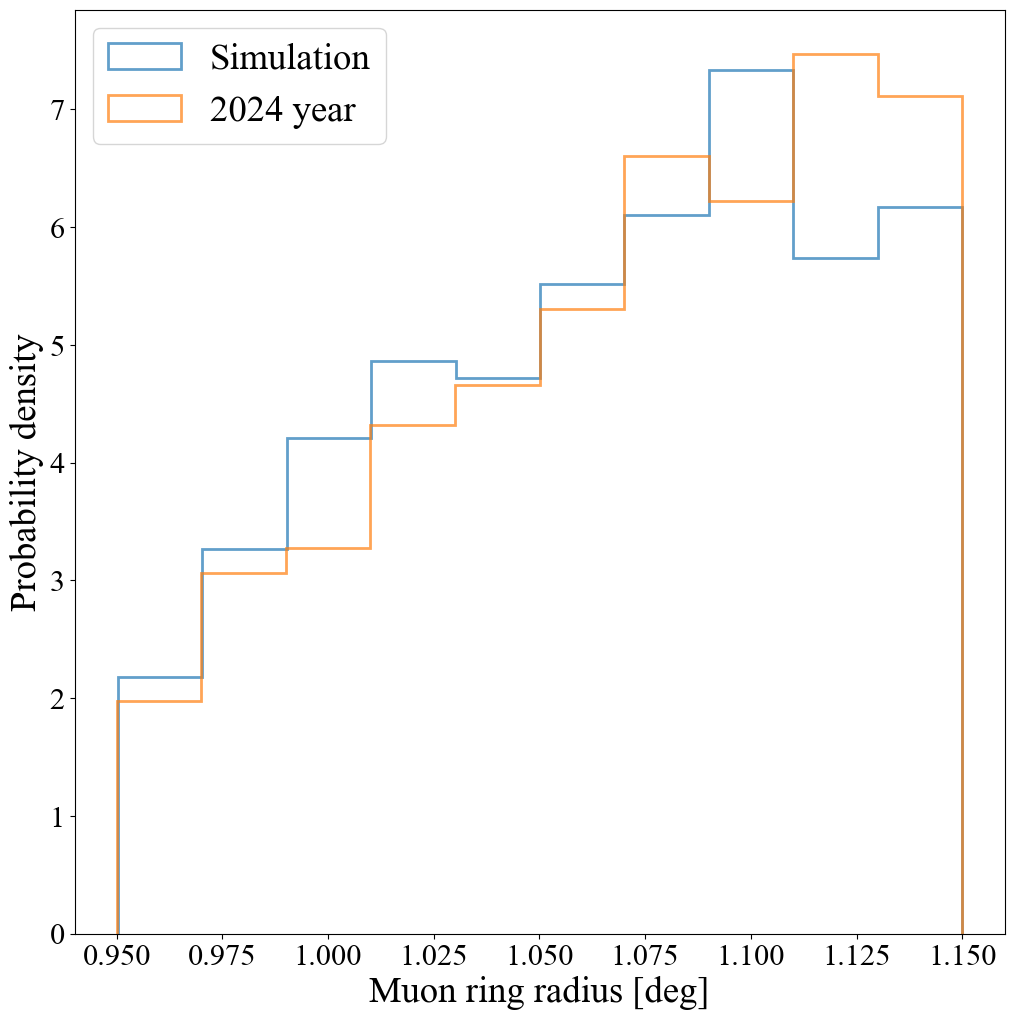

In [24]:
plt.hist(df_sim_cut_2024_tune['ring_radius'],density=True, bins=10, histtype='step', alpha = 0.7, linewidth = 2, label='Simulation')

#plt.hist(df_real_data_cut_2020['ring_radius'],density=True, bins=20, histtype='step', linewidth = 2, label='2020 year')
#plt.hist(df_real_data_cut_2021['ring_radius'],density=True, bins=20, histtype='step', linewidth = 2, label='2021 year')
#plt.hist(df_real_data_cut_2022['ring_radius'],density=True, bins=20, histtype='step', linewidth = 2, label='2022 year')
#plt.hist(df_real_data_cut_2023['ring_radius'],density=True, bins=10, histtype='step', linewidth = 2, label='2023 year')
plt.hist(df_real_data_cut_2024['ring_radius'],density=True, bins=10, histtype='step', alpha = 0.7, linewidth = 2, label='2024 year')
plt.xlabel('Muon ring radius [deg]')
plt.ylabel('Probability density')
plt.legend()
#plt.savefig('/Users/vdk/muons2024/images/AA_paper/muon_radius.pdf', dpi=200, format='pdf', bbox_inches='tight')

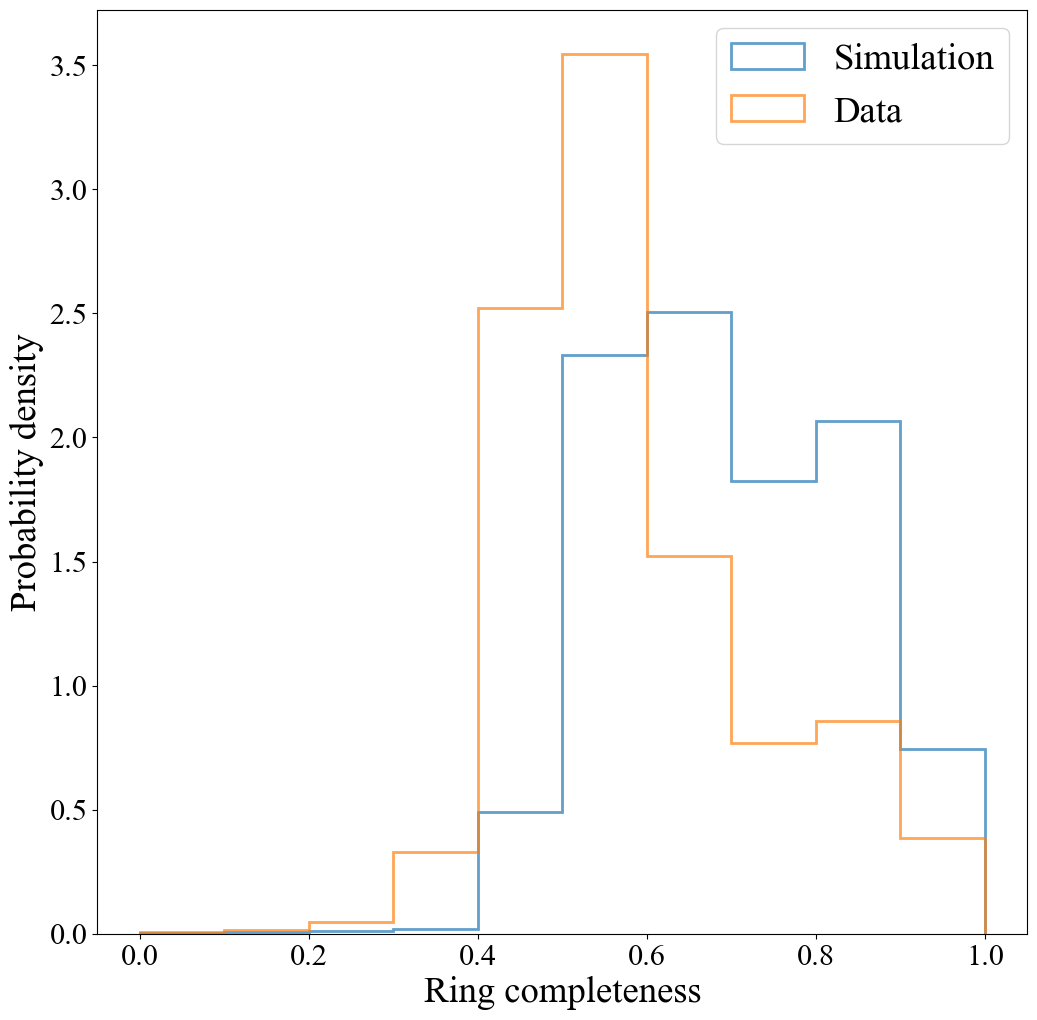

In [12]:
plt.hist(df_sim_2024_tune['ring_completeness'],density=True, bins=10, alpha = 0.7, histtype='step', linewidth = 2, label='Simulation')
plt.hist(df_good_data_real['ring_completeness'],density=True, bins = 10, alpha = 0.7, histtype='step', linewidth = 2, label='Data')
plt.xlabel('Ring completeness')
plt.ylabel('Probability density')
plt.legend()
#plt.savefig('/Users/vdk/muons2024/images/AA_paper/ring_completeness.pdf', dpi=200, format='pdf', bbox_inches='tight')


### Size vs radius

/var/folders/_p/3fmt5jz5231_9gxtm8xt76p00000gn/T/ipykernel_3928/2166720304.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_mc['binned_radius'] = pd.cut(data_mc['ring_radius'], bins, include_lowest=True, labels=False)
/var/folders/_p/3fmt5jz5231_9gxtm8xt76p00000gn/T/ipykernel_3928/2166720304.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_run['binned_radius'] = pd.cut(data_run['ring_radius'], bins, include_lowest=True, labels=False)


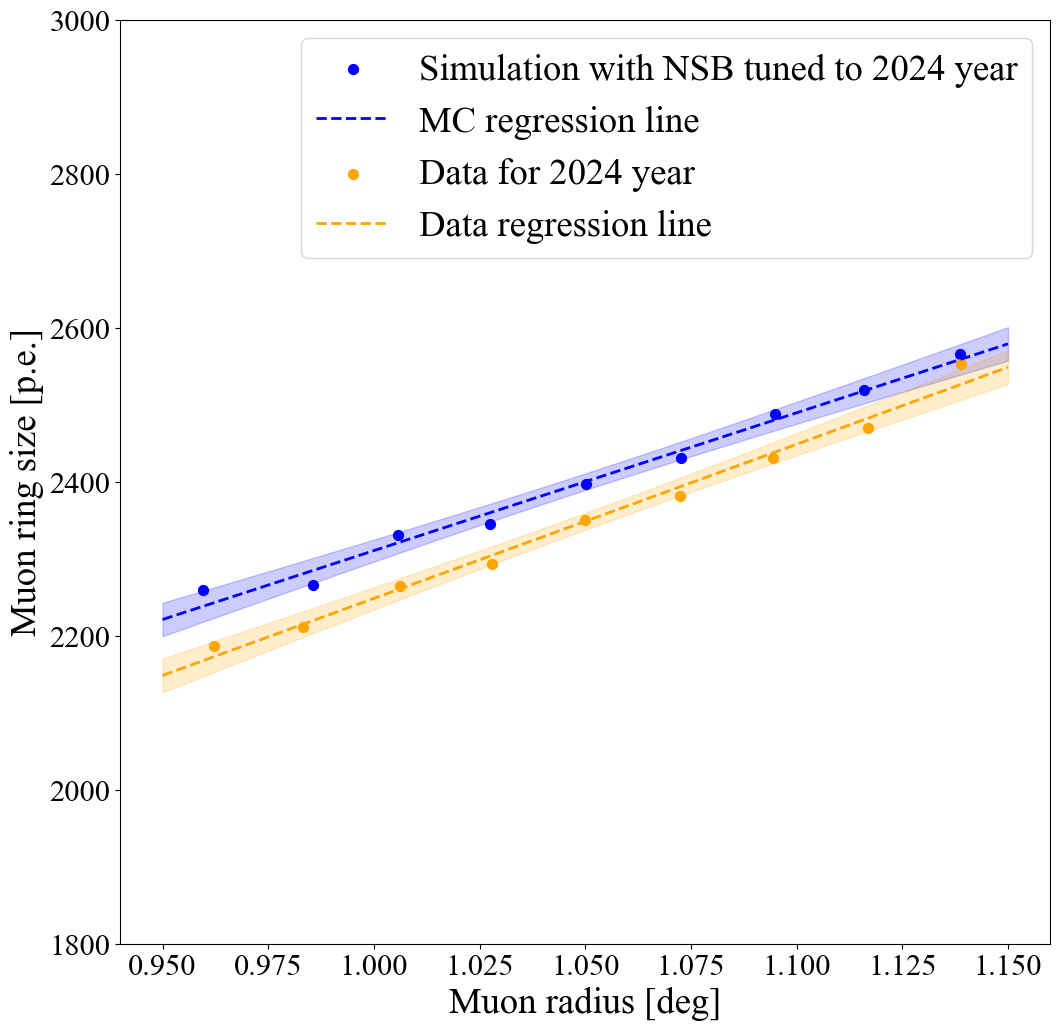

In [37]:
year_value = 2024
data_mc = df_sim_cut_2024_tune
data_run = eval(f"df_real_data_cut_{year_value}")


# Define the bins
bins = np.linspace(min_radius_cut, max_radius_cut, 10)
# Generate x values for the regression lines
x_values = np.linspace(bins.min(), bins.max(), 300)
x_values_with_const = sm.add_constant(x_values)


# Bin the data for MC
data_mc['binned_radius'] = pd.cut(data_mc['ring_radius'], bins, include_lowest=True, labels=False)
binned_mc = data_mc.groupby('binned_radius').agg({
    'ring_radius': 'mean',
    'ring_size': 'mean'
})
binned_mc['ring_size'] = binned_mc['ring_size']

binned_mc['constant'] = 1
model_mc = sm.OLS(binned_mc['ring_size'], binned_mc[['constant', 'ring_radius']]).fit()
y_values_mc = model_mc.predict(x_values_with_const)
prediction_mc = model_mc.get_prediction(x_values_with_const)
conf_int_mc = prediction_mc.conf_int()


# Bin the data for Run
data_run['binned_radius'] = pd.cut(data_run['ring_radius'], bins, include_lowest=True, labels=False)
binned_run = data_run.groupby('binned_radius').agg({
    'ring_radius': 'mean',
    'ring_size': 'mean'
})

binned_run['constant'] = 1
model_run = sm.OLS(binned_run['ring_size'], binned_run[['constant', 'ring_radius']]).fit()
y_values_run = model_run.predict(x_values_with_const)
prediction_run = model_run.get_prediction(x_values_with_const)
conf_int_run = prediction_run.conf_int()


# Plotting MC data
plt.scatter(binned_mc['ring_radius'], binned_mc['ring_size'], color='blue', label='Simulation with NSB tuned to 2024 year', s=50)
plt.plot(x_values, y_values_mc, color='blue', linestyle='--', label='MC regression line')
plt.fill_between(x_values, conf_int_mc[:, 0], conf_int_mc[:, 1], color='blue', alpha=0.2)

# plt.scatter(binned_data_2021['ring_radius'], binned_data_2021['ring_size'], color='blue', label='Simulation with tuned NSB to Run17043 (0.31 GHz)', s=50)
# plt.plot(x_values, y_values_data_2021, color='blue', linestyle='--', label='MC regression line')
# plt.fill_between(x_values, conf_int_data_2021[:, 0], conf_int_data_2021[:, 1], color='', alpha=0.2)

# Plotting Data Run
plt.scatter(binned_run['ring_radius'], binned_run['ring_size'], color='orange', label=f'Data for {year_value} year', s=50)

plt.plot(x_values, y_values_run, color='orange', linestyle='--', label='Data regression line')
plt.fill_between(x_values, conf_int_run[:, 0], conf_int_run[:, 1], color='orange', alpha=0.2)


# Adding labels and legend
plt.xlabel('Muon radius [deg]')
plt.ylabel('Muon ring size [p.e.]')
plt.legend()
plt.ylim(1800,3000)

#lt.savefig(f'/Users/vdk/muons2024/images/AA_paper/size_vs_radius_comp_{ring_completeness_cut}_year{year_value}_tuned_to{2024}.pdf', dpi=200, format='pdf', bbox_inches='tight')

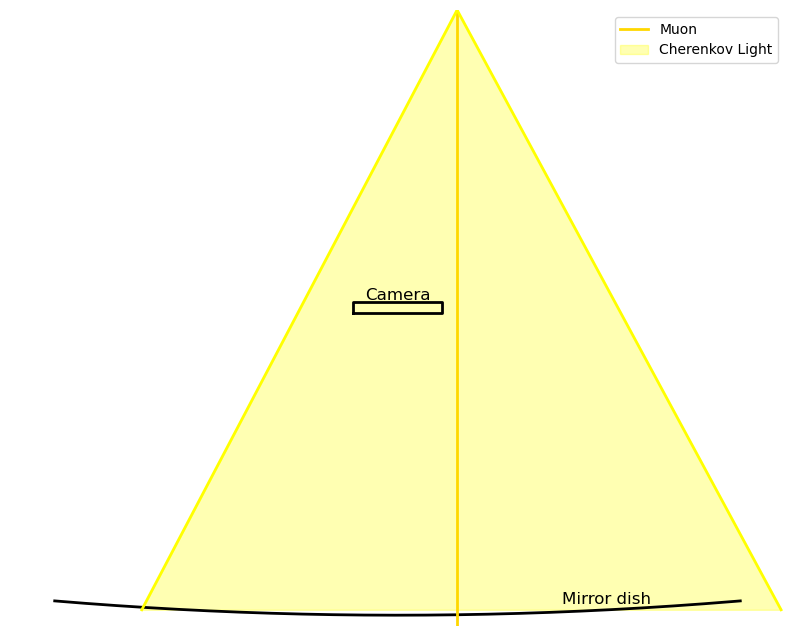

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

mirror_x = np.linspace(-11.5, 11.5, 400)
a = 0.01
mirror_y = a * mirror_x**2 - 26
ax.plot(mirror_x, mirror_y, 'k', linewidth=2)#, label='Mirror')

# Plot the camera as a rectangle
camera_x = [-1.5, 1.5, 1.5, -1.5, -1.5]
camera_y = [2, 2, 3, 3, 2]
ax.plot(camera_x, camera_y, 'k', linewidth=2)
ax.text(0, 3.2, 'Camera', horizontalalignment='center', fontsize=12)

# Plot the muon track as a vertical line
muon_x = [2, 2]
muon_y = [30, -35]
ax.plot(muon_x, muon_y, 'gold', linewidth=2, label='Muon')

# Plot the Cherenkov light cone
light_cone_angle = np.deg2rad(47)
x_light_cone_left = np.linspace(2, -8 * np.tan(light_cone_angle), 100)
x_light_cone_right = np.linspace(2, 12 * np.tan(light_cone_angle), 100)
y_light_cone = np.linspace(30, -25.5, 100)

ax.plot(x_light_cone_left, y_light_cone, 'yellow', linestyle='-', linewidth=2)
ax.plot(x_light_cone_right, y_light_cone, 'yellow', linestyle='-', linewidth=2)
ax.fill_betweenx(y_light_cone, x_light_cone_left, x_light_cone_right, color='yellow', alpha=0.3, label='Cherenkov Light')

# Add the "Not Detected in Real Data" regions
not_detected_x = [-4.5, -3.5, -2.5, -1.5, -0.5, 0.5, 1.5, 2.5, 3.5, 4.5]
not_detected_y = [-3.5, -3.8, -4.1, -4.4, -4.7, -4.7, -4.4, -4.1, -3.8, -3.5]
#ax.plot(not_detected_x, not_detected_y, 'r', linestyle='-', linewidth=2, label='Not Detected in Real Data')

# Annotate the diagram
#ax.text(0, -4.8, 'Not Detected in Real Data', horizontalalignment='center', fontsize=12, color='red')
ax.text(7, -25, 'Mirror dish', horizontalalignment='center', fontsize=12, color='black')
# Set limits and labels
ax.set_xlim(-13,13)
ax.set_ylim(-27, 30)
#ax.set_title('Schematic Representation of Muon Light Gathered by LST Camera (Not to Scale)')
ax.legend()

# Remove the axes
ax.axis('off')

# Show the plot
#plt.show()
plt.savefig(f'/Users/vdk/muons2024/images/AA_paper/shadowing_efect.pdf', dpi=200, format='pdf', bbox_inches='tight')